In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats
import scipy.stats as stats
import statistics as st 

In [2]:
df = pd.read_csv("fish1.txt",sep=" ")
df

,time,weight,rod_type
0,15.25,2.40,B
1,7.43,1.66,C
2,7.17,2.75,C
3,2.93,1.21,A
4,11.07,0.39,C
...,...,...,...
395,8.34,0.83,A
396,14.37,2.67,C
397,2.63,3.55,C
398,7.28,1.05,A


In [3]:
df.columns

Index(['time', 'weight', 'rod_type'], dtype='object')

In [4]:
df.sort_values(by='time',inplace=True,ignore_index=True)

In [5]:
df.describe()

,time,weight
count,400.000000,400.00000
mean,9.370525,1.66740
std,5.796400,1.10816
min,0.010000,0.01000
25%,4.325000,0.70750
50%,9.020000,1.61500
75%,13.747500,2.40000
max,22.270000,4.88000


In [6]:
origdf= df.copy(deep = True)
origdf

,time,weight,rod_type
0,0.01,1.31,C
1,0.10,3.54,C
2,0.14,2.23,B
3,0.26,2.54,A
4,0.38,1.19,C
...,...,...,...
395,21.34,2.58,C
396,22.11,1.43,C
397,22.20,2.03,C
398,22.26,0.77,C


In [7]:
df.drop_duplicates(subset=['time'], inplace=True)

In [8]:
df

,time,weight,rod_type
0,0.01,1.31,C
1,0.10,3.54,C
2,0.14,2.23,B
3,0.26,2.54,A
4,0.38,1.19,C
...,...,...,...
395,21.34,2.58,C
396,22.11,1.43,C
397,22.20,2.03,C
398,22.26,0.77,C


# Generate a plot that illustrates the distributions of time values in hourly basis

<Axes: xlabel='time', ylabel='Count'>

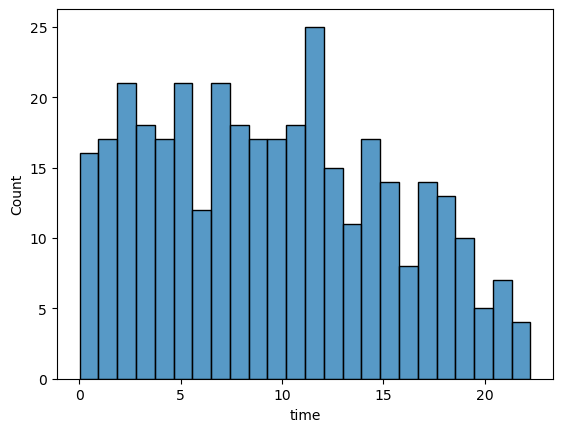

In [9]:
sns.histplot(data=df,x= 'time' ,bins=24)

# Generate a plot that illustrates the distributions of weight of fish values on weight basis

<Axes: xlabel='weight', ylabel='Count'>

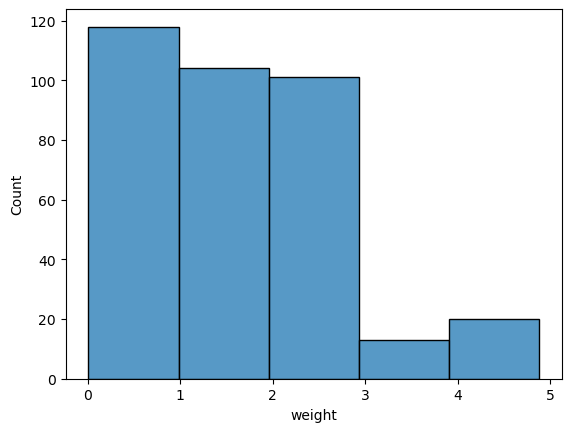

In [10]:
sns.histplot(data=df,x= 'weight' ,bins=5)

In [11]:
origdf

,time,weight,rod_type
0,0.01,1.31,C
1,0.10,3.54,C
2,0.14,2.23,B
3,0.26,2.54,A
4,0.38,1.19,C
...,...,...,...
395,21.34,2.58,C
396,22.11,1.43,C
397,22.20,2.03,C
398,22.26,0.77,C


In [12]:
df.describe()

,time,weight
count,356.000000,356.000000
mean,9.555197,1.673399
std,5.799989,1.124051
min,0.010000,0.010000
25%,4.700000,0.700000
50%,9.240000,1.615000
75%,14.082500,2.400000
max,22.270000,4.880000


In [13]:
a_df =df.groupby('rod_type').get_group(name = 'A')

df

,time,weight,rod_type
0,0.01,1.31,C
1,0.10,3.54,C
2,0.14,2.23,B
3,0.26,2.54,A
4,0.38,1.19,C
...,...,...,...
395,21.34,2.58,C
396,22.11,1.43,C
397,22.20,2.03,C
398,22.26,0.77,C


In [14]:
a_df[(a_df['weight']>=3.97)]

,time,weight,rod_type
72,3.16,4.88,A
75,3.33,3.97,A
97,4.24,4.50,A


In [15]:
# there are outline in A bait type
df.replace([3.97,4.88,4.50],value=st.mean(a_df['weight']), inplace=True)

In [16]:
a_df =df.groupby('rod_type').get_group(name = 'A')

a_df

,time,weight,rod_type
3,0.26,2.54,A
6,0.39,1.85,A
7,0.55,0.19,A
9,0.65,2.26,A
14,0.78,0.99,A
...,...,...,...
345,17.06,0.53,A
365,18.22,1.92,A
367,18.36,0.98,A
386,19.95,1.30,A


In [17]:
a_df.describe()

,time,weight
count,70.000000,70.000000
mean,6.083429,1.384596
std,5.402066,0.827878
min,0.260000,0.010000
25%,1.725000,0.755000
50%,4.155000,1.320000
75%,8.800000,1.847500
max,20.790000,3.190000


In [18]:
b_df =df.groupby('rod_type').get_group(name = 'B')

In [19]:
c_df = df.groupby('rod_type').get_group(name = 'C')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 0 to 399
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      356 non-null    float64
 1   weight    356 non-null    float64
 2   rod_type  356 non-null    object 
dtypes: float64(2), object(1)
memory usage: 11.1+ KB


In [21]:
df[df['weight']>= 3.605 ]

,time,weight,rod_type
8,0.56,4.87,C
12,0.74,4.23,C
20,1.04,4.10,C
50,2.28,4.24,B
57,2.44,4.66,C
58,2.60,3.87,C
77,3.37,4.05,C
81,3.46,3.65,C
86,3.77,4.62,C
112,4.90,4.64,C


In [22]:
df

,time,weight,rod_type
0,0.01,1.31,C
1,0.10,3.54,C
2,0.14,2.23,B
3,0.26,2.54,A
4,0.38,1.19,C
...,...,...,...
395,21.34,2.58,C
396,22.11,1.43,C
397,22.20,2.03,C
398,22.26,0.77,C


In [23]:
a_df.describe()

,time,weight
count,70.000000,70.000000
mean,6.083429,1.384596
std,5.402066,0.827878
min,0.260000,0.010000
25%,1.725000,0.755000
50%,4.155000,1.320000
75%,8.800000,1.847500
max,20.790000,3.190000


In [24]:
1.90+1.5*(1.9-0.75)

3.625

In [25]:
b_df.describe()

,time,weight
count,56.000000,56.000000
mean,10.704464,1.816250
std,5.769935,1.087935
min,0.140000,0.160000
25%,6.650000,0.865000
50%,10.240000,1.810000
75%,15.730000,2.377500
max,20.160000,4.750000


In [26]:
2.377500+1.5*(2.377500-0.865000)

4.64625

In [27]:
df[df['weight']==4.66]

,time,weight,rod_type
57,2.44,4.66,C
156,7.05,4.66,B


In [28]:
df[df['weight']==4.75]

,time,weight,rod_type
234,10.9,4.75,C
375,18.9,4.75,B


In [29]:
df.loc[156,'weight']=4.64

In [30]:
df.loc[375,'weight']=4.64

In [31]:
c_df

,time,weight,rod_type
0,0.01,1.31,C
1,0.10,3.54,C
4,0.38,1.19,C
8,0.56,4.87,C
11,0.73,1.10,C
...,...,...,...
395,21.34,2.58,C
396,22.11,1.43,C
397,22.20,2.03,C
398,22.26,0.77,C


In [32]:
c_df.describe()

,time,weight
count,230.000000,230.000000
mean,10.332000,1.688174
std,5.544986,1.155302
min,0.010000,0.010000
25%,5.942500,0.692500
50%,10.580000,1.690000
75%,14.342500,2.460000
max,22.270000,4.870000


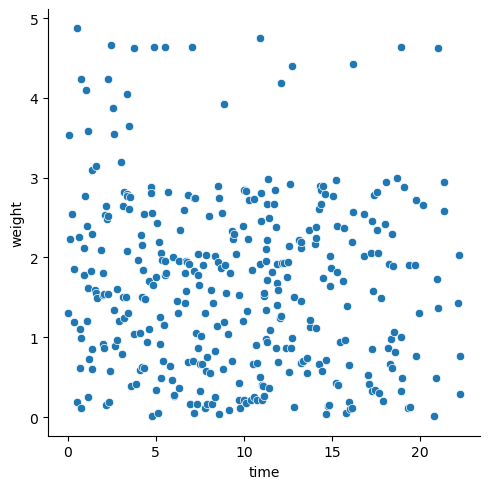

In [33]:
sns.relplot(data = df, x='time', y='weight')

In [34]:
b_df.describe()

,time,weight
count,56.000000,56.000000
mean,10.704464,1.816250
std,5.769935,1.087935
min,0.140000,0.160000
25%,6.650000,0.865000
50%,10.240000,1.810000
75%,15.730000,2.377500
max,20.160000,4.750000


In [35]:
c_df.describe()

,time,weight
count,230.000000,230.000000
mean,10.332000,1.688174
std,5.544986,1.155302
min,0.010000,0.010000
25%,5.942500,0.692500
50%,10.580000,1.690000
75%,14.342500,2.460000
max,22.270000,4.870000


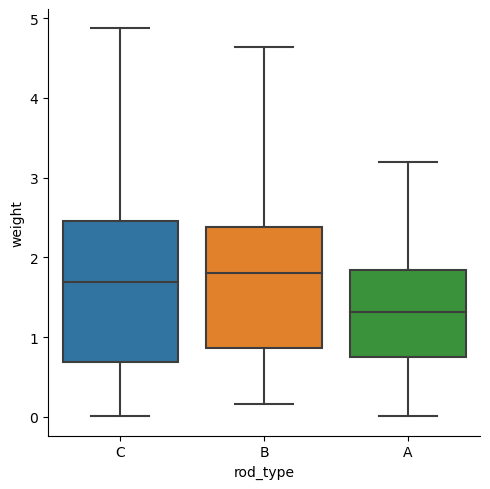

In [36]:
sns.catplot(data=df, x= 'rod_type',y = 'weight', kind='box')

<Axes: xlabel='time', ylabel='weight'>

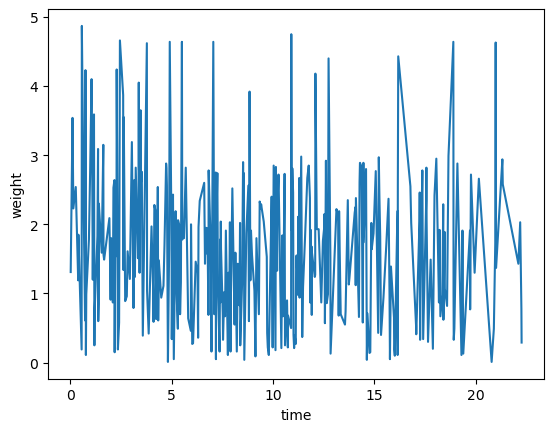

In [37]:
sns.lineplot(data=df,x='time', y='weight')

<Axes: xlabel='time', ylabel='weight'>

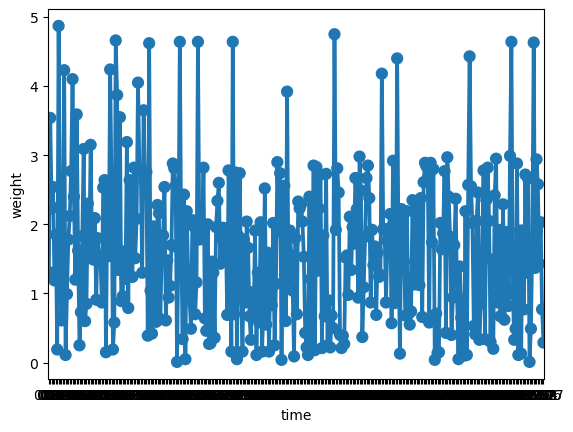

In [38]:
sns.pointplot(data=df,x='time', y='weight')

In [39]:
df

,time,weight,rod_type
0,0.01,1.31,C
1,0.10,3.54,C
2,0.14,2.23,B
3,0.26,2.54,A
4,0.38,1.19,C
...,...,...,...
395,21.34,2.58,C
396,22.11,1.43,C
397,22.20,2.03,C
398,22.26,0.77,C


<Axes: xlabel='rod_type', ylabel='weight'>

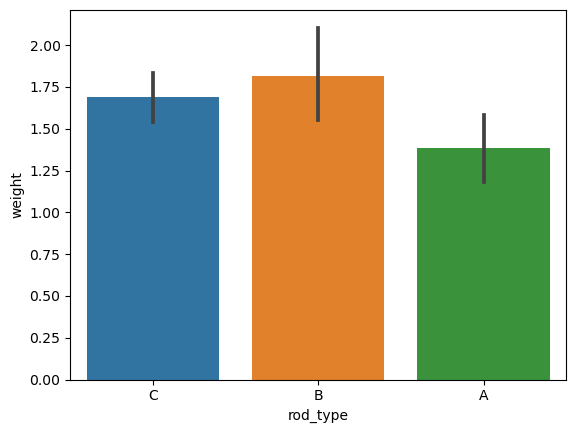

In [40]:
sns.barplot(data=df,x='rod_type',y='weight')

In [41]:
df[df['rod_type']=='C']

,time,weight,rod_type
0,0.01,1.31,C
1,0.10,3.54,C
4,0.38,1.19,C
8,0.56,4.87,C
11,0.73,1.10,C
...,...,...,...
395,21.34,2.58,C
396,22.11,1.43,C
397,22.20,2.03,C
398,22.26,0.77,C


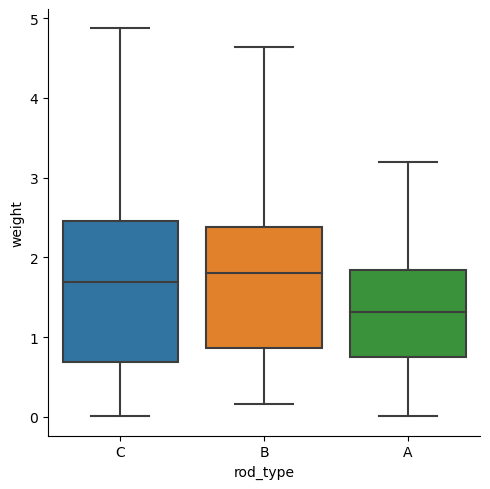

In [42]:
sns.catplot(data=df,x='rod_type',y='weight',kind='box')

In [43]:
mc=df[df['rod_type']=='C']['weight']
mb=df[df['rod_type']=='B']['weight']
ma=df[df['rod_type']=='A']['weight']



In [44]:
ma.mean()

1.384595918367347

In [45]:
mb.mean()

1.8139285714285713

In [46]:
mc.mean()

1.6881739130434783

In [47]:
weightstats.ztest(ma,mb)

(-2.5237581807789233, 0.011610776676784246)

In [48]:
weightstats.ztest(mb,mc)

(0.7393597378097645, 0.4596885837260555)

In [49]:
weightstats.ztest(ma,mc)

(-2.043518465712294, 0.04100114131595898)

<Axes: xlabel='rod_type', ylabel='weight'>

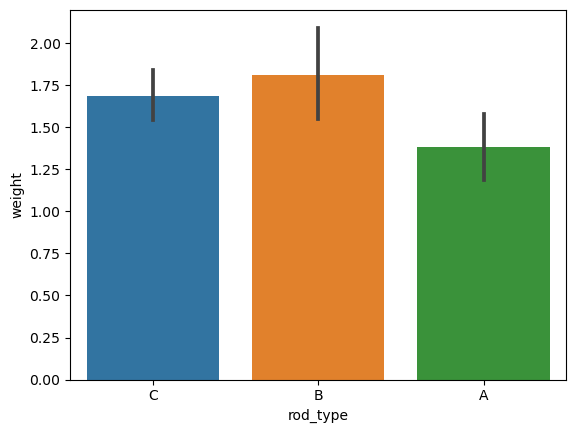

In [50]:
sns.barplot(data=df,x='rod_type',y='weight')

<Axes: xlabel='rod_type', ylabel='Count'>

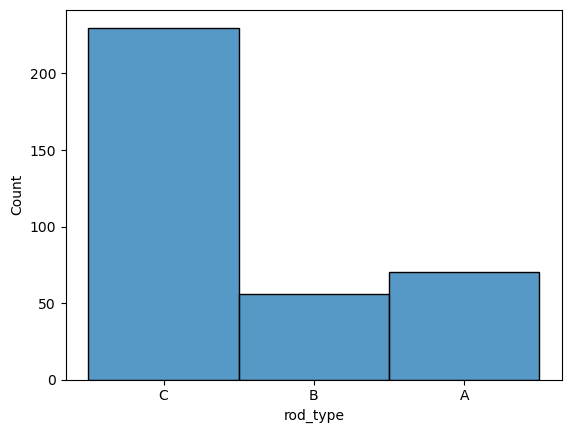

In [51]:
sns.histplot(data=df,x='rod_type')

<Axes: xlabel='time', ylabel='Count'>

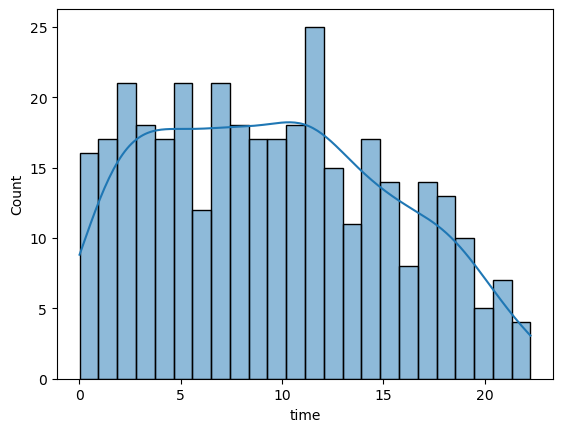

In [52]:
sns.histplot(data=df,x='time',kde=True,bins=24)

In [53]:
min(df['weight'])

0.01

In [54]:
max(df['weight'])

4.87

In [55]:
baitc = df[df['rod_type']=='C']

In [56]:
baitc.sort_values(by='time', inplace=True)

C:\Users\ckv20\AppData\Local\Temp\ipykernel_8704\2469069970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baitc.sort_values(by='time', inplace=True)


<Axes: xlabel='weight', ylabel='Count'>

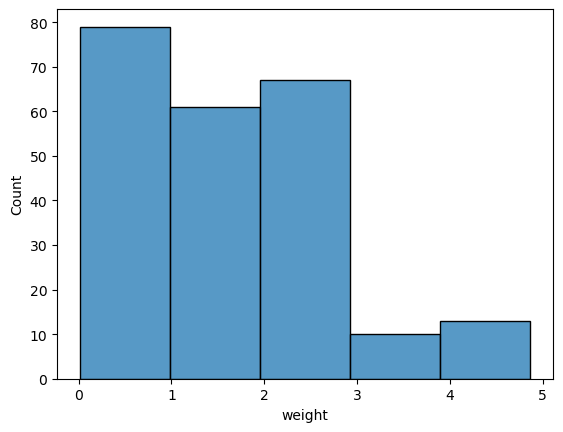

In [57]:
sns.histplot(data= baitc, x= 'weight', bins=5)

In [58]:
len(df['weight'].unique())

222

In [59]:
df

,time,weight,rod_type
0,0.01,1.31,C
1,0.10,3.54,C
2,0.14,2.23,B
3,0.26,2.54,A
4,0.38,1.19,C
...,...,...,...
395,21.34,2.58,C
396,22.11,1.43,C
397,22.20,2.03,C
398,22.26,0.77,C


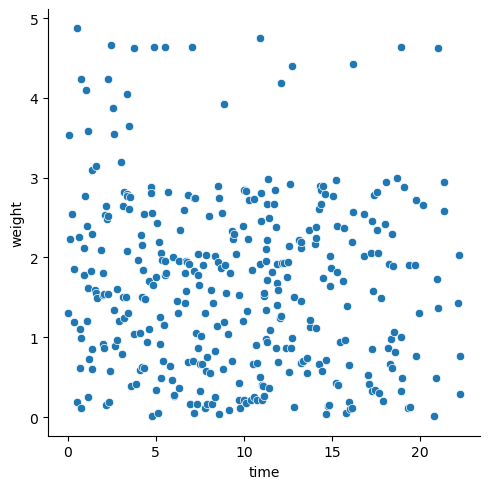

In [60]:
sns.relplot(data=df,x='time',y='weight')

In [61]:

a_df['weight'].mean()

1.384595918367347

In [62]:
b_df['weight'].mean()

1.8162500000000001

In [63]:
c_df['weight'].mean()

1.6881739130434783

In [64]:
after3pm = df[df['time'] >= 15]

In [65]:
after3pm

,time,weight,rod_type
321,15.07,2.77,C
323,15.19,0.43,C
324,15.22,2.97,C
325,15.25,2.40,B
327,15.29,1.82,B
...,...,...,...
395,21.34,2.58,C
396,22.11,1.43,C
397,22.20,2.03,C
398,22.26,0.77,C


<Axes: xlabel='rod_type', ylabel='Count'>

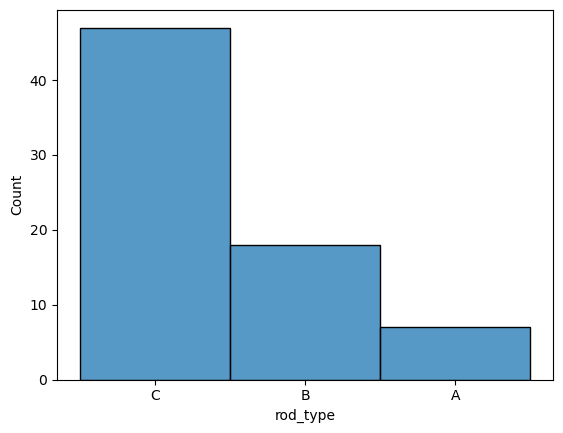

In [66]:
sns.histplot(data=after3pm,x='rod_type')

In [67]:
b3pm= after3pm[after3pm['rod_type'] =='B']['weight']
c3pm= after3pm[after3pm['rod_type'] =='C']['weight']
a3pm = after3pm[after3pm['rod_type'] =='A']['weight']

In [68]:
b3pm.mean()

1.8527777777777774

In [69]:
c3pm.mean()

1.5636170212765959

In [70]:
a3pm.mean()

0.7614285714285713

In [71]:
weightstats.ztest(a3pm,b3pm)

(-2.5499439150116197, 0.010774024984968026)

In [72]:
weightstats.ztest(b3pm,c3pm)

(0.9090339042008225, 0.36333222955039746)

In [73]:
weightstats.ztest(b3pm,c3pm,alternative='larger')

(0.9090339042008225, 0.18166611477519873)

In [74]:
weightstats.ztest(b3pm,c3pm,alternative='smaller')

(0.9090339042008225, 0.8183338852248012)

# Which bait is most effective? 
 Bait B

# What is the best type of bait to use at 3pm in the afternoon?

Bait is B, because average weight of B is more than A & C

In [75]:
df.sort_values(by='weight',ascending=False)

,time,weight,rod_type
8,0.56,4.87,C
234,10.90,4.75,C
57,2.44,4.66,C
375,18.90,4.64,B
128,5.50,4.64,C
...,...,...,...
333,15.77,0.05,C
314,14.63,0.04,C
191,8.58,0.04,C
388,20.79,0.01,A


In [76]:
df

,time,weight,rod_type
0,0.01,1.31,C
1,0.10,3.54,C
2,0.14,2.23,B
3,0.26,2.54,A
4,0.38,1.19,C
...,...,...,...
395,21.34,2.58,C
396,22.11,1.43,C
397,22.20,2.03,C
398,22.26,0.77,C


In [77]:
time = 0
while (time < 23) :
    print(f" Average weight between time is {time} and {time+4} => {st.mean(df[(df['time']>= time) & (df['time']<= (time+4)) ]['weight'])}")
    time += 4

 Average weight between time is 0 and 4 => 1.9985676691729324
 Average weight between time is 4 and 8 => 1.5246984126984127
 Average weight between time is 8 and 12 => 1.518641975308642
 Average weight between time is 12 and 16 => 1.593934426229508
 Average weight between time is 16 and 20 => 1.5693478260869564
 Average weight between time is 20 and 24 => 1.7441666666666666


# What is the best time to go fishing at this lake? 

The best time for fishing is between 12 AM to 4 AM (Early morning) 

# What is the correlation between X and Y? Analyse the amount of information about Y that is given by knowledge of X. 

There is netural correlation time (X) and weight (Y), and it is infered from the scatter plot

In [78]:
df.corr()

C:\Users\ckv20\AppData\Local\Temp\ipykernel_8704\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,time,weight
time,1.000000,-0.098087
weight,-0.098087,1.000000


In [79]:
df.cov()

C:\Users\ckv20\AppData\Local\Temp\ipykernel_8704\1545644723.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,time,weight
time,33.639876,-0.621787
weight,-0.621787,1.194545


<Axes: xlabel='rod_type', ylabel='weight'>

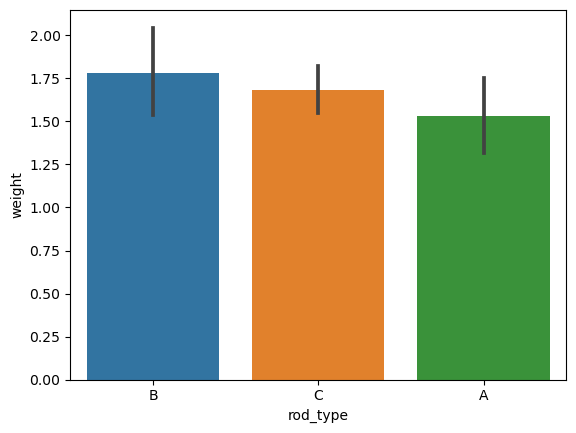

In [4]:
sns.barplot(data= df, x='rod_type',y='weight')